# Supermarket Sales
----

## Table of Contents

## Load the Data

In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.simplefilter("ignore")

In [364]:
df = pd.read_csv('C:/Users/user/1/Downloads/Supermarket Sales/supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [365]:
df.shape

(1000, 17)

## Features Explanation
- Invoice Id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C)
- City: Location of supercenters
- Customer Type: Type of customers, recorded by Members for customers using member card and Normal for without member card
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- cogs:  Cost of goods sold
- gross margin percentage: Gross margin percentage
- gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)


## Data Cleaning

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [367]:
any(df.isnull().sum())

False

There are no null values in the dataset

In [368]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

All transactions are unique, so we will drop the column `Invoice ID` and the `gross margin percentage` as well because these features don't give us any information.

In [369]:
df.drop('Invoice ID', axis=1, inplace=True)
df.drop('gross margin percentage', axis=1, inplace=True)

Obviously, the columns `Date` and `Time` represents the date and time of the transaction, so we will transform them in the respective data types and combine them into one column.

In [370]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

df['DateTime'] = df['Date'].dt.date.astype(str) + ' ' + df['Time'].astype(str)

df['DateTime'] = pd.to_datetime(df['DateTime'])
df.drop(columns=['Date', 'Time'], inplace=True)

df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,DateTime
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,2019-01-05 13:08:00
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,2019-03-08 10:29:00
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,2019-03-03 13:23:00
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,2019-01-27 20:33:00
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2019-02-08 10:37:00


### Let's take a first look at the data

In [371]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,DateTime
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,2019-01-05 13:08:00
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,2019-03-08 10:29:00
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,2019-03-03 13:23:00
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,2019-01-27 20:33:00
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2019-02-08 10:37:00


We observe that the features `Tax 5%` and `gross income` are the same.  

In [372]:
if (df['Tax 5%'] == df['gross income']).all():
    print("The features are the same, so we dropped the column 'Tax 5%'")
    df.drop('Tax 5%', axis=1, inplace=True)
else:
    print('The columns are NOT the same')

The features are the same, so we dropped the column 'Tax 5%'


We observe that the columns `Total` , `cogs` and `gross income` have a linear relationship.
It's obvious for the first entry for example that :  

548.9715 (Total) = 522.83 (cogs) + 26.1415 (gross income) 

In [373]:
# Check if Total ≈ cogs + gross income for all rows
# np.isclose(a, b) allows small numerical differences due to floating-point rounding.

check = np.isclose(df['Total'], df['cogs'] + df['gross income'])

# Are all rows satisfying the relationship?
if check.all():
    print("✅ The relationship holds for all rows.")
else:
    print("❌ The relationship does NOT hold for all rows.")
    print("Mismatched rows:")
    print(df[~check])  # Show rows where the relationship fails


✅ The relationship holds for all rows.


In [374]:
print('Dataset Shape:', df.shape)
print("")
df.head()

Dataset Shape: (1000, 13)



,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,cogs,gross income,Rating,DateTime
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,522.83,26.1415,9.1,2019-01-05 13:08:00
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,76.40,3.8200,9.6,2019-03-08 10:29:00
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,Credit card,324.31,16.2155,7.4,2019-03-03 13:23:00
3,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,Ewallet,465.76,23.2880,8.4,2019-01-27 20:33:00
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,Ewallet,604.17,30.2085,5.3,2019-02-08 10:37:00


## Exploratory Data Analysis

In [375]:
# DateTime
day_start = df['DateTime'].dt.date.min()
day_close = df['DateTime'].dt.date.max()

date_diff = day_close - day_start

print(f'Day Start: {day_start}')
print(f'Day Close: {day_close}')
print(f"The difference between the dates is: {date_diff.days} days")

Day Start: 2019-01-01
Day Close: 2019-03-30
The difference between the dates is: 88 days


### Let's explore the distribution of discrete variables

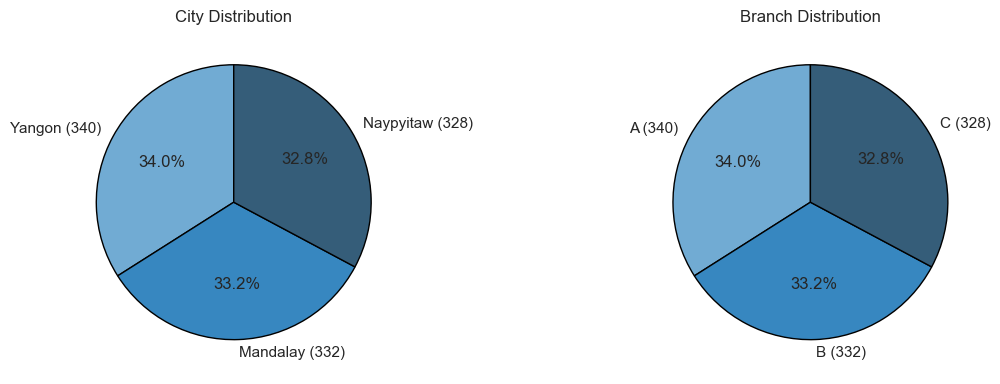

In [376]:
# City - Branch 

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
city_counts = df['City'].value_counts()
labels = [f'{city} ({count})' for city, count in city_counts.items()]
plt.pie(city_counts, labels=labels, startangle=90, colors=sns.color_palette("Blues_d", len(city_counts)),
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('City Distribution')

plt.subplot(1,2,2)
branch_counts = df['Branch'].value_counts()
labels = [f'{branch} ({count})' for branch, count in branch_counts.items()]
plt.pie(branch_counts, labels=labels, startangle=90, colors=sns.color_palette("Blues_d", len(branch_counts)),
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Branch Distribution')

plt.tight_layout()
plt.show()

We observe that the frequencies of each city correspond to the frequencies of the branch feature.  
Let's check whether the Branch and City columns have the exact same values for their levels:

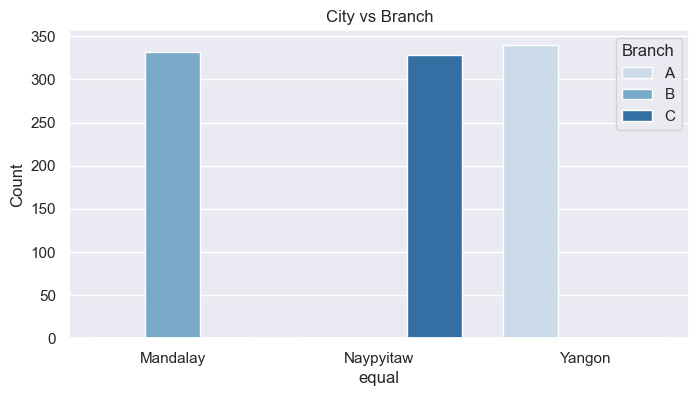

Branch,City,A,B,C
0,Mandalay,0,332,0
1,Naypyitaw,0,0,328
2,Yangon,340,0,0


In [403]:
city_branch_table = pd.crosstab(df['City'], df['Branch'])

city_branch_table = city_branch_table.reset_index()
city_branch_table_long = city_branch_table.melt(id_vars=['City'], var_name='Branch', value_name='Count')

plt.figure(figsize=(8, 4))
sns.barplot(x='City', y='Count', hue='Branch', data=city_branch_table_long, palette="Blues")

plt.title('City vs Branch')
plt.xlabel('City')
plt.ylabel('Count')
plt.xlabel('equal')
plt.show()

city_branch_table

Hence:
- The city Yangon corresponds to the branch A
- THe city Naypyitaw corresponds to the branch C
- The city Mandalay corresponds to the branch B

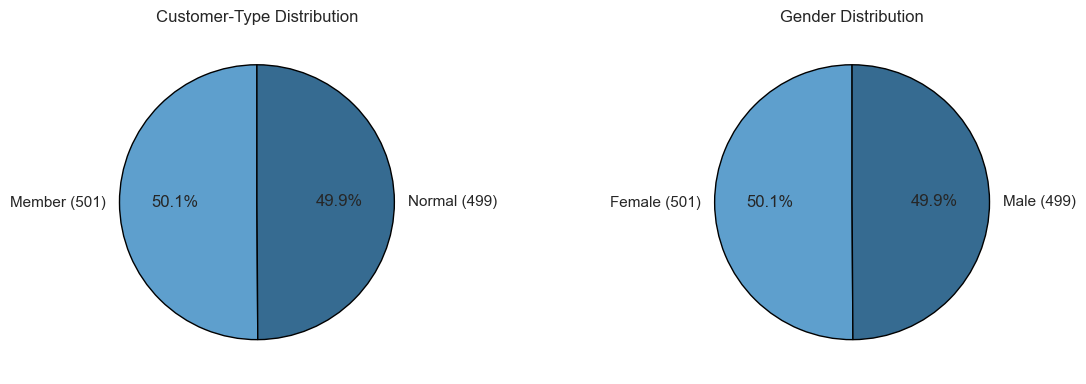

In [378]:
# Customer Type - Gender 

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
customer_type_counts = df['Customer type'].value_counts()
labels = [f'{customer} ({count})' for customer, count in customer_type_counts.items()]
plt.pie(customer_type_counts, labels=labels, startangle=90, colors=sns.color_palette("Blues_d", len(customer_type_counts)),
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Customer-Type Distribution')

plt.subplot(1,2,2)
gender_counts = df['Gender'].value_counts()
labels = [f'{gender} ({count})' for gender, count in gender_counts.items()]
plt.pie(gender_counts, labels=labels, startangle=90, colors=sns.color_palette("Blues_d", len(gender_counts)),
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

There is exaclty the same situation for the columns `Customer type` and `Gender` features.  
The two pies above indicate that all members are women and all normal type customers are men.

In [379]:
print(df[df['Customer type']=='Member']['Gender'].value_counts())
print("")
print(df[df['Customer type']=='Normal']['Gender'].value_counts())

Female    261
Male      240
Name: Gender, dtype: int64

Male      259
Female    240
Name: Gender, dtype: int64


However, the things are not like the City-Branch case. If we take a look in the contigency table and the following plot we will see that this is not true

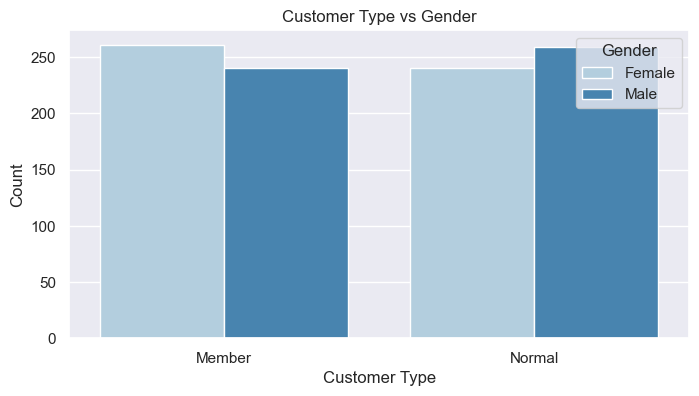

Gender,Customer type,Female,Male
0,Member,261,240
1,Normal,240,259


In [380]:
customer_type_gender_table = pd.crosstab(df['Customer type'], df['Gender'])

customer_type_gender_table = customer_type_gender_table.reset_index()
customer_type_gender_long = customer_type_gender_table.melt(id_vars=['Customer type'], var_name='Gender', value_name='Count')

plt.figure(figsize=(8, 4))
sns.barplot(x='Customer type', y='Count', hue='Gender', data=customer_type_gender_long, palette="Blues")

plt.title('Customer Type vs Gender')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

customer_type_gender_table

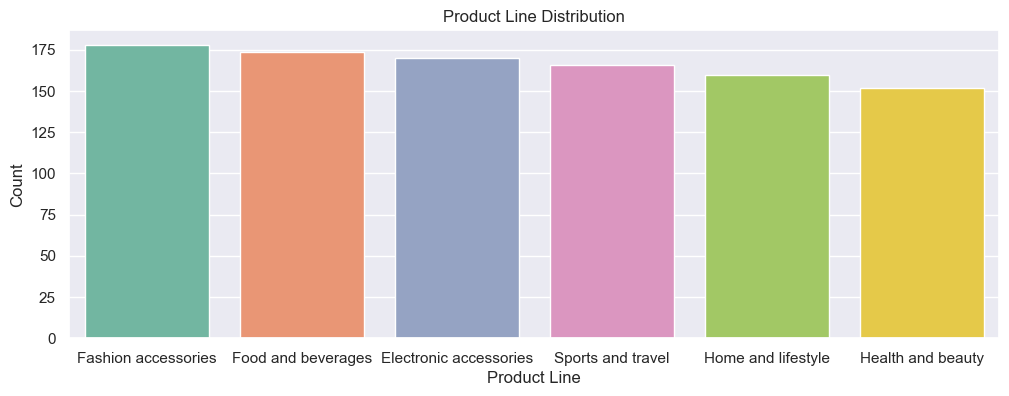

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [381]:
product_line_counts = df['Product line'].value_counts()

plt.figure(figsize=(12, 4))
sns.barplot(x=product_line_counts.index, y=product_line_counts.values, palette="Set2")

plt.title('Product Line Distribution')
plt.xlabel('Product Line')
plt.ylabel('Count')

plt.show()

product_line_counts

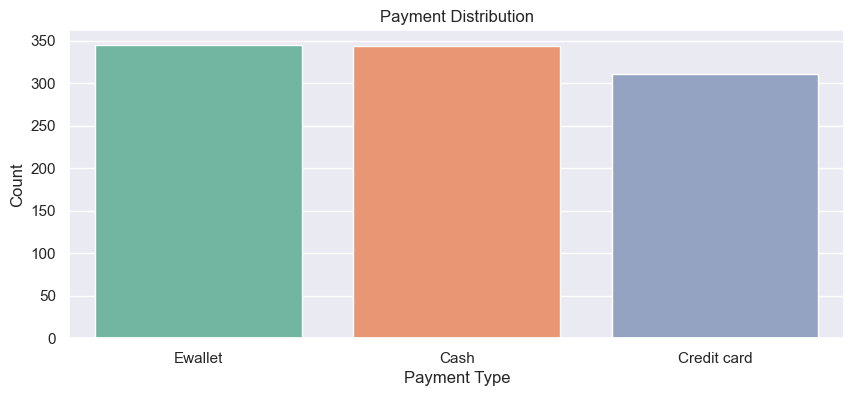

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [382]:
# Payment
payment_counts = df['Payment'].value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="Set2")

plt.title('Payment Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')

plt.show()

payment_counts

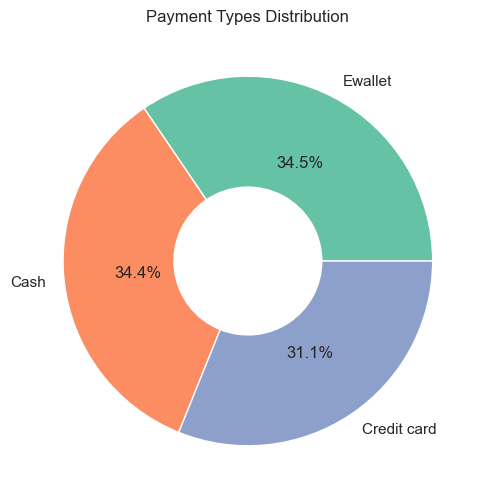

In [383]:
# Payment
payment_counts = df['Payment'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("Set2", len(payment_counts)),
        wedgeprops={'width': 0.6})  # This makes it a donut chart

plt.title('Payment Types Distribution')

plt.show()

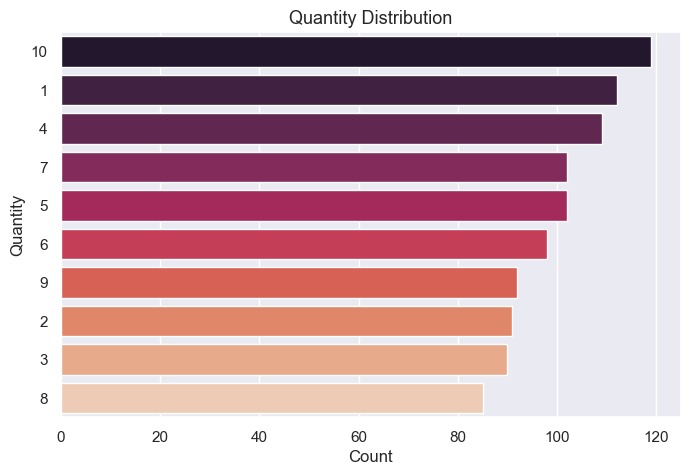

In [384]:
df['Quantity'] = df['Quantity'].astype(str)

quantity_counts = df['Quantity'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=quantity_counts.values, y=quantity_counts.index, palette="rocket", orient='h')

plt.title('Quantity Distribution', fontsize=13)
plt.xlabel('Count')
plt.ylabel('Quantity')

plt.show()
df['Quantity'] = df['Quantity'].astype(int)

### Let's explore the distribution of the continuous features

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Branch         1000 non-null   object        
 1   City           1000 non-null   object        
 2   Customer type  1000 non-null   object        
 3   Gender         1000 non-null   object        
 4   Product line   1000 non-null   object        
 5   Unit price     1000 non-null   float64       
 6   Quantity       1000 non-null   int32         
 7   Total          1000 non-null   float64       
 8   Payment        1000 non-null   object        
 9   cogs           1000 non-null   float64       
 10  gross income   1000 non-null   float64       
 11  Rating         1000 non-null   float64       
 12  DateTime       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int32(1), object(6)
memory usage: 97.8+ KB


In [390]:
len(continuous_vars.columns)

5

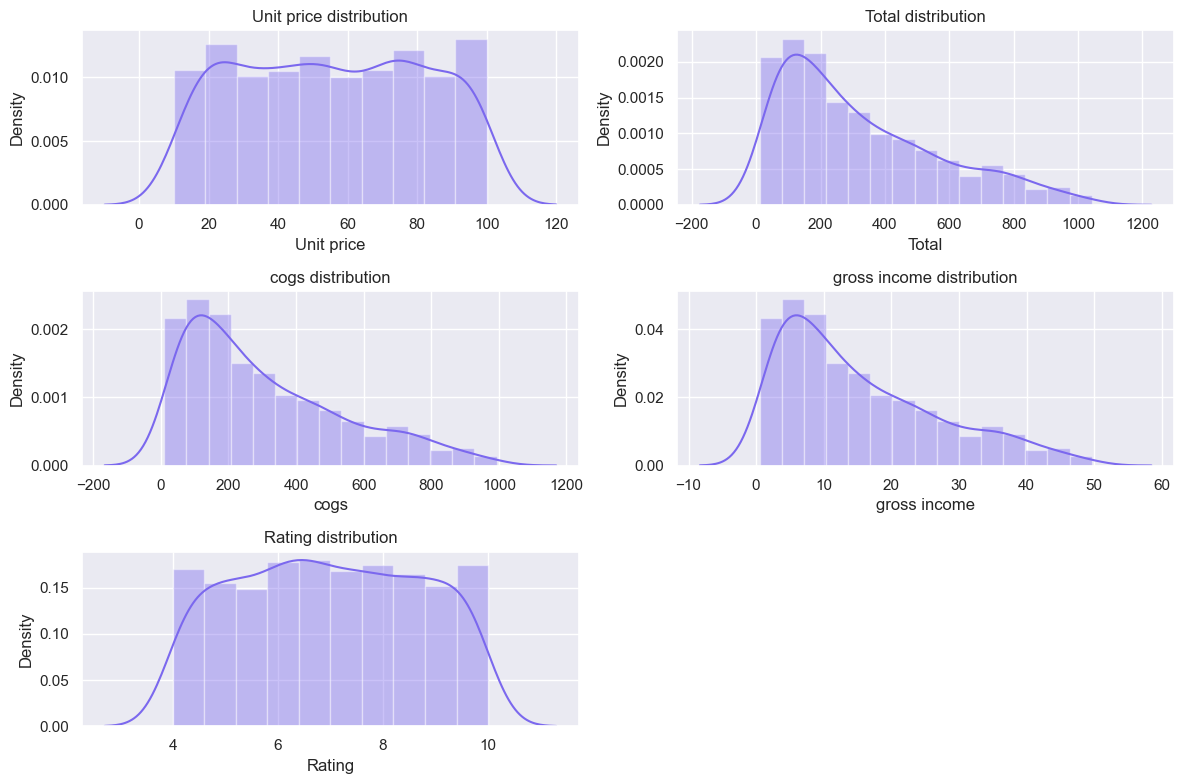

In [399]:
continuous_vars = df.select_dtypes(include=['float'])
plt.figure(figsize=(12,8))
for i, col in enumerate(continuous_vars.columns, 1):
    plt.subplot(3,2,i)
    sns.distplot(df[col], color='mediumslateblue')   
    plt.title(f'{col} distribution')
plt.tight_layout()
plt.show()

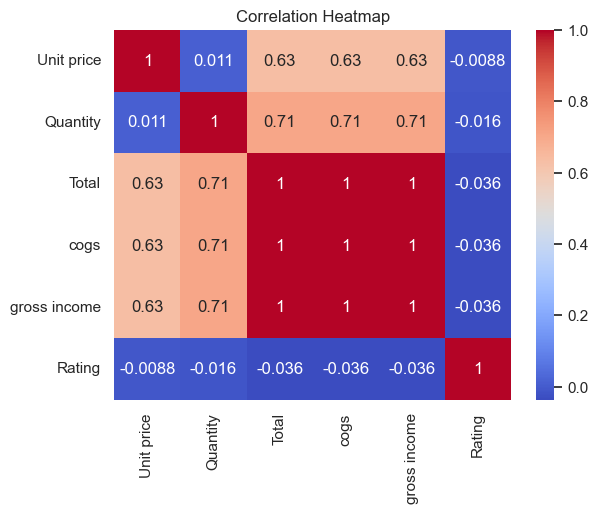

In [408]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There is a perfect linear relationship among the features `Total`, `cogs` & `gross income` .  
As we saw at the beginning it's obvious that :  

$$ 
\text{Total} = \text{Cogs} + \text{Gross Income}
$$

- These variables have a strong positive linear relationship (correlation = 0.71), meaning that as the Quantity increases, the Total tends to increase as well.$


## Key Questions
1.  Which gender spend the more?
2.  Which product line have the biggest gross income?
3.  Does a supermarket member spend more on average than a normal member ? 
4.  What times of the day the supermarket have the most activity?
5.  What's the average total spend by Payment Method?